In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('loan_data.csv')

#Exploratory Data Analysis

In [3]:
# What data looks like?

data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
# How huge is our data?
data.shape

(9578, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
#Lets get a statistical view of data
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
# Lets find out if there are any missing values

data.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
data['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

#### Note : As the data is unbalanced we could evaluate the model with Statistical approach

In [9]:
#lets find the pearson correlation between features (variables)

import seaborn as sns

Corr = data.corr(method='pearson')
Corr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


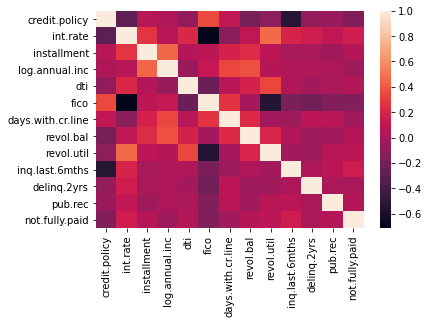

In [10]:
sns.heatmap(Corr)

In [11]:
#In order to perform VIF we need to form a variable set of numerical features

data.columns
X = data.drop(['purpose'],axis=1)
X.dtypes == 'object'

credit.policy        False
int.rate             False
installment          False
log.annual.inc       False
dti                  False
fico                 False
days.with.cr.line    False
revol.bal            False
revol.util           False
inq.last.6mths       False
delinq.2yrs          False
pub.rec              False
not.fully.paid       False
dtype: bool

In [12]:
#Lets perform VIF to choose drop multicolinear variables

from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [13]:
calculate_vif_(X)

dropping 'log.annual.inc' at index: 3
dropping 'fico' at index: 4
dropping 'int.rate' at index: 1
Remaining variables:
Index(['credit.policy', 'installment', 'dti', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid'],
      dtype='object')


,credit.policy,installment,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,829.10,19.48,5639.958333,28854,52.1,0,0,0,0
1,1,228.22,14.29,2760.000000,33623,76.7,0,0,0,0
2,1,366.86,11.63,4710.000000,3511,25.6,1,0,0,0
3,1,162.34,8.10,2699.958333,33667,73.2,1,0,0,0
4,1,102.92,14.97,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
9573,0,344.76,10.39,10474.000000,215372,82.1,2,0,0,1
9574,0,257.70,0.21,4380.000000,184,1.1,5,0,0,1
9575,0,97.81,13.09,3450.041667,10036,82.9,8,0,0,1
9576,0,351.58,19.18,1800.000000,0,3.2,5,0,0,1


In [14]:
#Hence we need to drop of the muliticolinear variables from data

data = data.drop(['log.annual.inc','fico','int.rate'],axis=1)

In [15]:
data

,credit.policy,purpose,installment,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,829.10,19.48,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,228.22,14.29,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,366.86,11.63,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,162.34,8.10,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,102.92,14.97,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,344.76,10.39,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,257.70,0.21,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,97.81,13.09,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,351.58,19.18,1800.000000,0,3.2,5,0,0,1


In [16]:
#Lets divide our data into features and labels

features = data.iloc[:,1:].values
labels = data.iloc[:,0].values


In [17]:
features

array([['debt_consolidation', 829.1, 19.48, ..., 0, 0, 0],
       ['credit_card', 228.22, 14.29, ..., 0, 0, 0],
       ['debt_consolidation', 366.86, 11.63, ..., 0, 0, 0],
       ...,
       ['debt_consolidation', 97.81, 13.09, ..., 0, 0, 1],
       ['home_improvement', 351.58, 19.18, ..., 0, 0, 1],
       ['debt_consolidation', 853.43, 16.28, ..., 0, 0, 1]], dtype=object)

In [18]:
features.shape

(9578, 10)

In [19]:
# Lets perform One hot encoding for categorical features

from sklearn.preprocessing import OneHotEncoder
ohepurpose = OneHotEncoder(sparse=False)
fpurpose = ohepurpose.fit_transform(features[:,[0]].reshape(-1,1))

In [20]:
fpurpose

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [21]:
#concaetnate the fstate with features
features = np.concatenate((features,fpurpose),axis=1)

In [22]:
features.shape

(9578, 17)

In [23]:
features[0][0]

'debt_consolidation'

In [24]:
#Drop the categorical columns

features = np.delete(features, 0, 1)

In [25]:
features

array([[829.1, 19.48, 5639.958333, ..., 0.0, 0.0, 0.0],
       [228.22, 14.29, 2760.0, ..., 0.0, 0.0, 0.0],
       [366.86, 11.63, 4710.0, ..., 0.0, 0.0, 0.0],
       ...,
       [97.81, 13.09, 3450.041667, ..., 0.0, 0.0, 0.0],
       [351.58, 19.18, 1800.0, ..., 1.0, 0.0, 0.0],
       [853.43, 16.28, 4740.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [26]:
#Standardization for features

from sklearn.preprocessing import StandardScaler
scfeatures = StandardScaler()

features = scfeatures.fit_transform(features)

In [27]:
#As we have to build a deep learning Model,Hence standardization of labels is neccessary

#Standardization for labels
#from sklearn.preprocessing import LabelEncoder
#le_credit_policy = LabelEncoder()
#labels = le_credit_policy.fit_transform(labels)

In [28]:
labels

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
#to create dummy variables we can use Keras Functionality
#import tensorflow as tf

#ohelables = tf.keras.utils.to_categorical(labels)
#ohelables

In [30]:
features.ndim

2

In [31]:
labels.ndim

1

In [32]:
# We need to reshape the labels
labels = labels.reshape(-1,1)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=50)

In [34]:
X_train.shape

(7662, 16)

In [35]:
print('Training data Shape:',X_train.shape)
print('Testing data Shape:',X_test.shape)

Training data Shape: (7662, 16)
Testing data Shape: (1916, 16)


In [71]:
# Modelling

#1.Architect the model
import tensorflow as tf

#Step 1: Create a Sequential Model Object
model = tf.keras.models.Sequential()

#Step2: Create Input Layer


model.add(tf.keras.layers.Dense( units=60,activation='relu',kernel_initializer=tf.keras.initializers.GlorotUniform(),input_shape=(16,) ))
model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
#model.add(tf.keras.layers.Dense( units=60,kernel_initializer=tf.keras.initializers.RandomNormal(mean=0,stddev=1),bias_initializer=tf.keras.initializers.GlorotUniform(),activation='relu'))
model.add(tf.keras.layers.Dense( units=1,activation='sigmoid'))

In [84]:
#Model Compliation
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name='RMSprop'),loss='binary_crossentropy', metrics=["accuracy"])

In [85]:
# MOdel Fitting

model.fit(X_train,y_train,epochs=1000, validation_data=(X_test,y_test))

Epoch 1/1000
240/240 [==============================] - 1s 3ms/step - loss: 7.9450e-12 - accuracy: 1.0000 - val_loss: 7.5643 - val_accuracy: 0.8951
Epoch 2/1000
240/240 [==============================] - 1s 2ms/step - loss: 7.5257e-11 - accuracy: 1.0000 - val_loss: 8.5781 - val_accuracy: 0.8977
Epoch 3/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.4448 - accuracy: 0.9143 - val_loss: 0.2922 - val_accuracy: 0.8904
Epoch 4/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2591 - accuracy: 0.9115 - val_loss: 0.4793 - val_accuracy: 0.8779
Epoch 5/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2583 - accuracy: 0.9096 - val_loss: 0.2836 - val_accuracy: 0.9066
Epoch 6/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2561 - accuracy: 0.9174 - val_loss: 0.2958 - val_accuracy: 0.8993
Epoch 7/1000
240/240 [==============================] - 1s 2ms/step - loss: 0.2979 - accuracy: 0.9131 - val_loss: 0.2973 - val_a

In [89]:
print("Training Score : ",model.evaluate(X_train,y_train)[1])
print("Testing Score : ",model.evaluate(X_test,y_test)[1])

240/240 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.8865
Training Score :  0.8864526152610779
60/60 [==============================] - 0s 1ms/step - loss: 0.3918 - accuracy: 0.8700
Testing Score :  0.8700417280197144


In [90]:
# Under fitting is best mananged with RMS prop Optimzer